In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C:\\Users\\Kuku Sharma\\Downloads\\bank_loan.csv")

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


While Analysing the data tere are 5000 rows and 14 columns.
ID--> It represent the customer id.
AGE--> It represent the customer's age.
Experience--> It represent how many years of experience.
ZIP Code--> Represent a particular code for adrress.
Family--> Shows the size of the family[How many people in a family]
CCAvg--> Average spending using credit card per month
Education--> Represent Education Level
.  Undergra
 .  Graduat.
 . Professional
Mortgage--> Represent the value of house mortgage.
Personal loan--> Customer accept the personal loan
Securities Account--> Customer has security account in this or not[0, 1]
CD Account--> Represent the customer has deposit or not.
Online--> Represent customer uses online system or not.
CreditCard--> Does customer uses a credit card or not[0, 1]
)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


There are 14 columns out of which Personal Loan is a target columns and rest are the feature columns.

In [6]:
data['CCAvg'] = data['CCAvg'].str.replace('/', '.').astype('float64')

In [7]:
# Printing all the data types of the columns
for cols in data:
    print(f'The {cols} has {data[cols].dtypes}')


The ID has int64
The Age has int64
The Experience has int64
The Income has int64
The ZIP Code has int64
The Family has int64
The CCAvg has float64
The Education has int64
The Mortgage has int64
The Personal Loan has int64
The Securities Account has int64
The CD Account has int64
The Online has int64
The CreditCard has int64


In [8]:
#Checking if the data has null values
data.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no NULL values in this data.

In [9]:
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [10]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

While analysing the data I found that the ID and Zip code are not important feature.

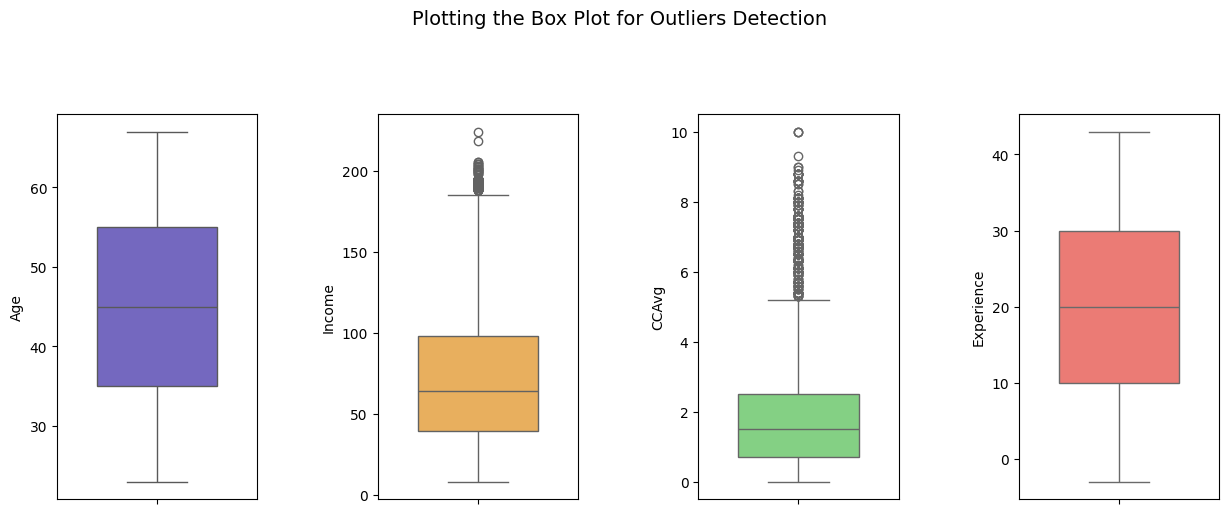

In [11]:
cols = ['Age', 'Income', 'CCAvg', 'Experience']
colors = ['#6A5ACD', '#FFB347', '#77DD77', '#FF6961']
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, axs in enumerate(axes):
    sns.boxplot(data[cols[i]], ax=axs, width=0.6, color=colors[i])

fig.suptitle('Plotting the Box Plot for Outliers Detection', fontsize=14, y=1.09) 
plt.subplots_adjust(wspace=0.6)

In [12]:
#Here checking the values that is below zero
negative_values_count = data[data['Experience']<0].shape[0]
print('Total negatives values in experierence columns: ',negative_values_count)

Total negatives values in experierence columns:  52


In [13]:
# #Now make all the negative values to Positive
data['Experience'] = data['Experience'].abs()

In [14]:
#Function for checking the total counts of outliers that are present in this data.
def detect_outliers(data, columns):
    outliers_cnt={}
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
        outliers_cnt[i]= len(outliers)
    
    return outliers_cnt

In [15]:
colums = ['Age', 'Income', 'Experience']
counts= detect_outliers(data, colums)
for name, cnts in counts.items():
    print(f'Column {name} has {cnts} outliers')

Column Age has 0 outliers
Column Income has 96 outliers
Column Experience has 0 outliers


In [16]:
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [17]:
# In whole data the id and ZIP Code is not important so we are going to drop it
data.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [18]:
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_22380\3692005090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Online', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.7)


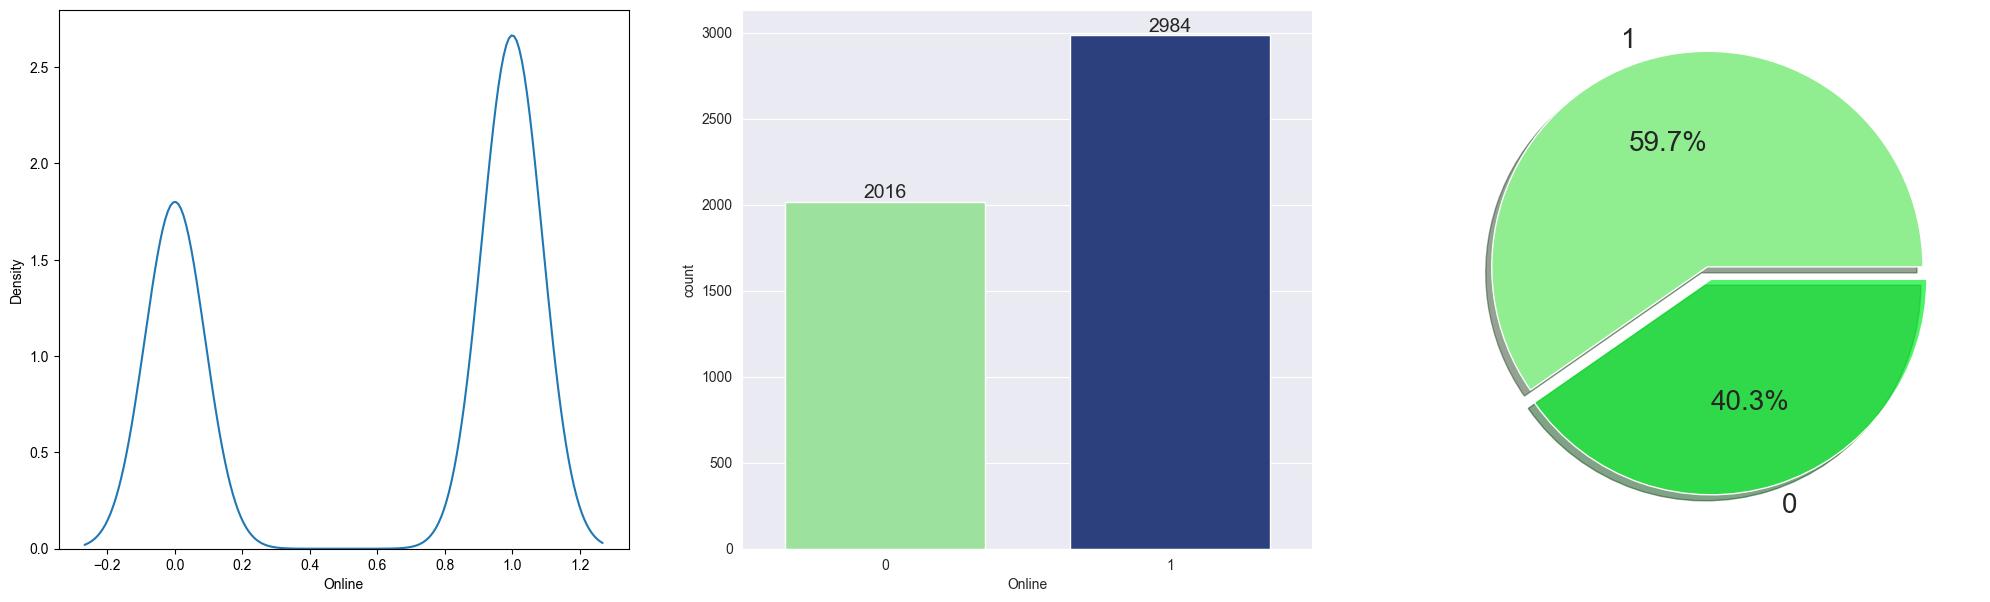

In [19]:
# Plotting the count plot to check that how many customer use online system
x = data['Online'].value_counts()
labels=['1','0']
colors = ['#90EE90', '#1E3B']
plt.figure(figsize=(25, 7))
plt.subplot(1, 3, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=data, x='Online')

plt.subplot(1, 3, 2)
ax = sns.countplot(x='Online', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.7)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.subplot(1, 3, 3)
plt.pie(x, labels=labels, autopct='%1.1f%%',colors=colors, explode=[0.06, 0], shadow=True, textprops={'fontsize':20})
plt.show()

These graphs show the count of customer to know whether they are using online system or not.
Around 59.7% customers use online system and there are 40.3% that not use the online system.

In [20]:
#Here 1--> Represents the customer using the online system.
# 0--> Represents the customer is not using the online system. 
online_system = data['Online'].value_counts()
for i,val in online_system.items():
    print(f'{i} has {val} values')

1 has 2984 values
0 has 2016 values


In [21]:
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


In [22]:
data['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_22380\3004308160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CreditCard', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.6)


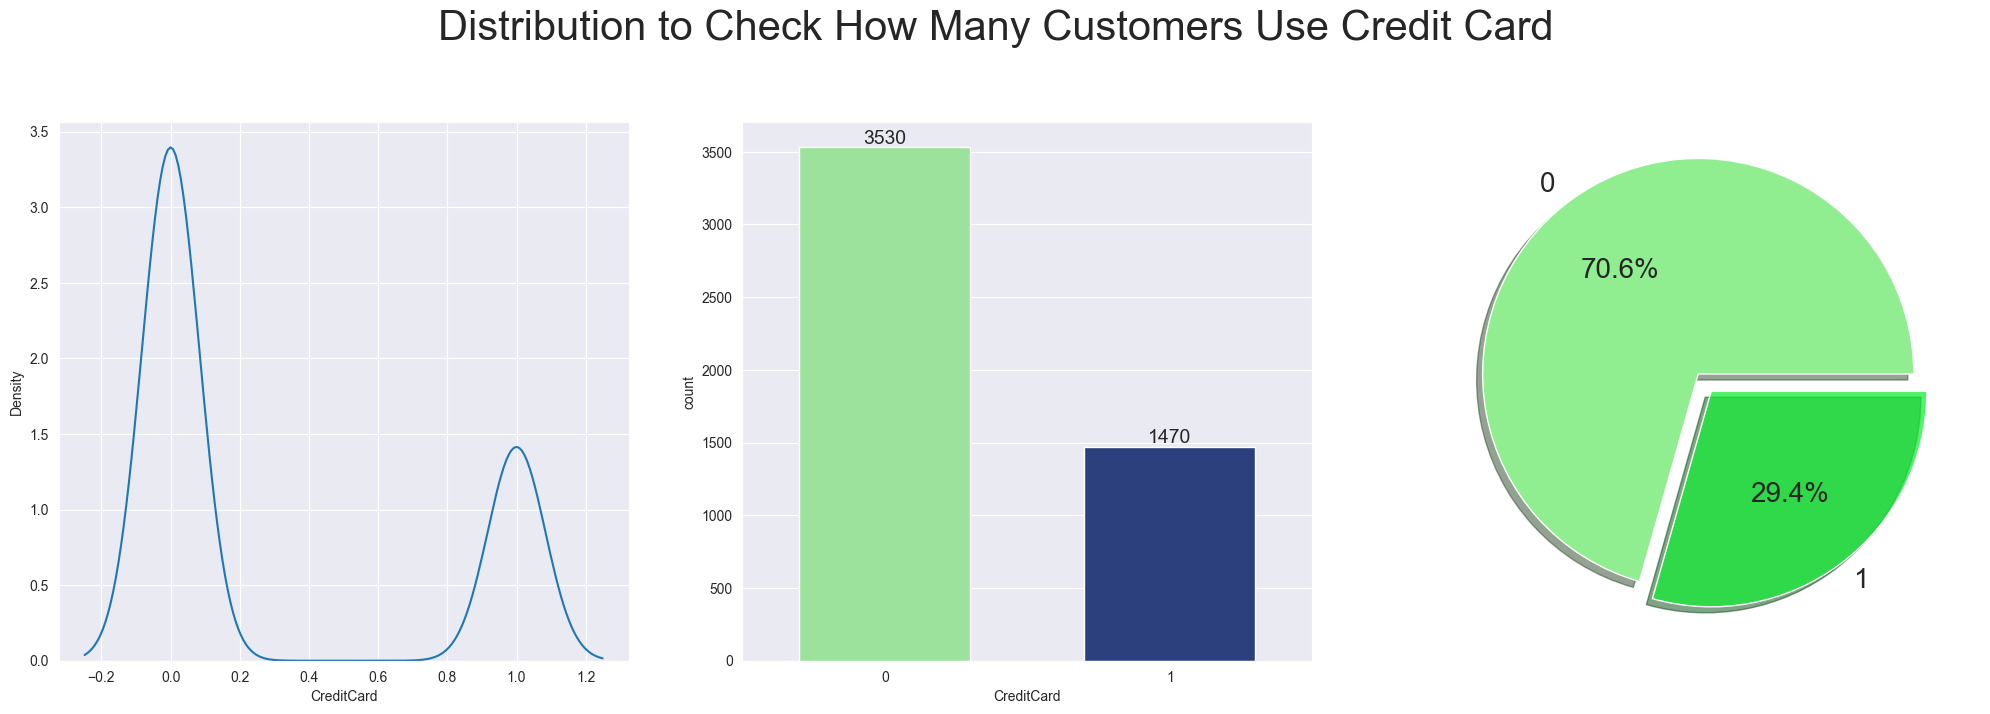

In [23]:
# Plotting the count plot to check that how many customer use online system

x = data['CreditCard'].value_counts()
labels=['0','1']
colors = ['#90EE90', '#1E3B']
plt.figure(figsize=(25, 7))

plt.suptitle('Distribution to Check How Many Customers Use Credit Card', fontsize=30, y=1.04)
#KDE PLOT
plt.subplot(1, 3, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=data, x='CreditCard')

#COUNT PLOT
plt.subplot(1, 3, 2)
ax = sns.countplot(x='CreditCard', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.6)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

#PIE CHART
plt.subplot(1, 3, 3)
plt.pie(x, labels=labels, autopct='%1.1f%%',colors=colors, explode=[0.1, 0], shadow=True, textprops={'fontsize':20})
plt.show()

Shows that only 29.4% people use the credit card.

In [24]:
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


In [25]:
# Getting the counts of 
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_22380\3308676407.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CD Account', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.7)


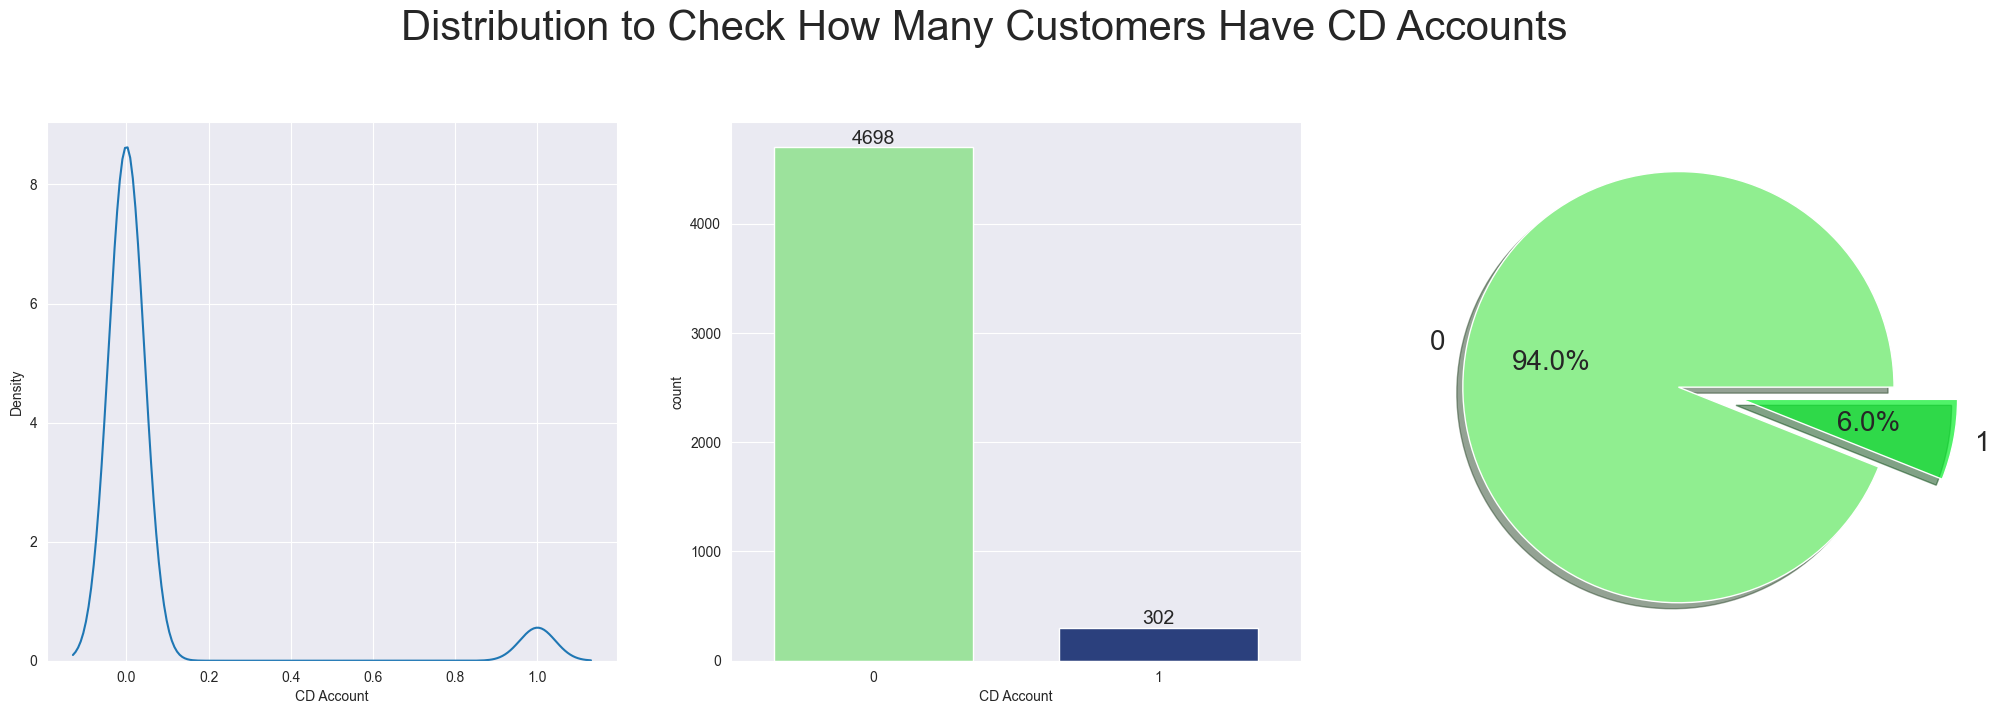

In [26]:
# Plotting the count plot to check that how many customer use online system

x = data['CD Account'].value_counts()
labels=['0','1']
colors = colors = ['#90EE90', '#1E3B']


plt.figure(figsize=(25, 7))
plt.subplot(1, 3, 1)
sns.set_style('darkgrid')

plt.suptitle('Distribution to Check How Many Customers Have CD Accounts', fontsize=30, y=1.04)

#KDE PLOT
sns.kdeplot(data=data, x='CD Account')

#COUNT PLOT
plt.subplot(1, 3, 2)
ax = sns.countplot(x='CD Account', data=data, palette = ['#90EE90', '#1E3A8A'], width=0.7)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )


#PIE CHART 
plt.subplot(1, 3, 3)
plt.pie(x, labels=labels, autopct='%1.1f%%',colors=colors, explode=[0.1, 0.2], shadow=True, textprops={'fontsize':20})
plt.show()

In [27]:
#Getting the count of the customer that uses the credit card.
data['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_22380\266613264.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Securities Account', data=data, palette=['#90EE90', '#1E3A8A'], width=0.7)


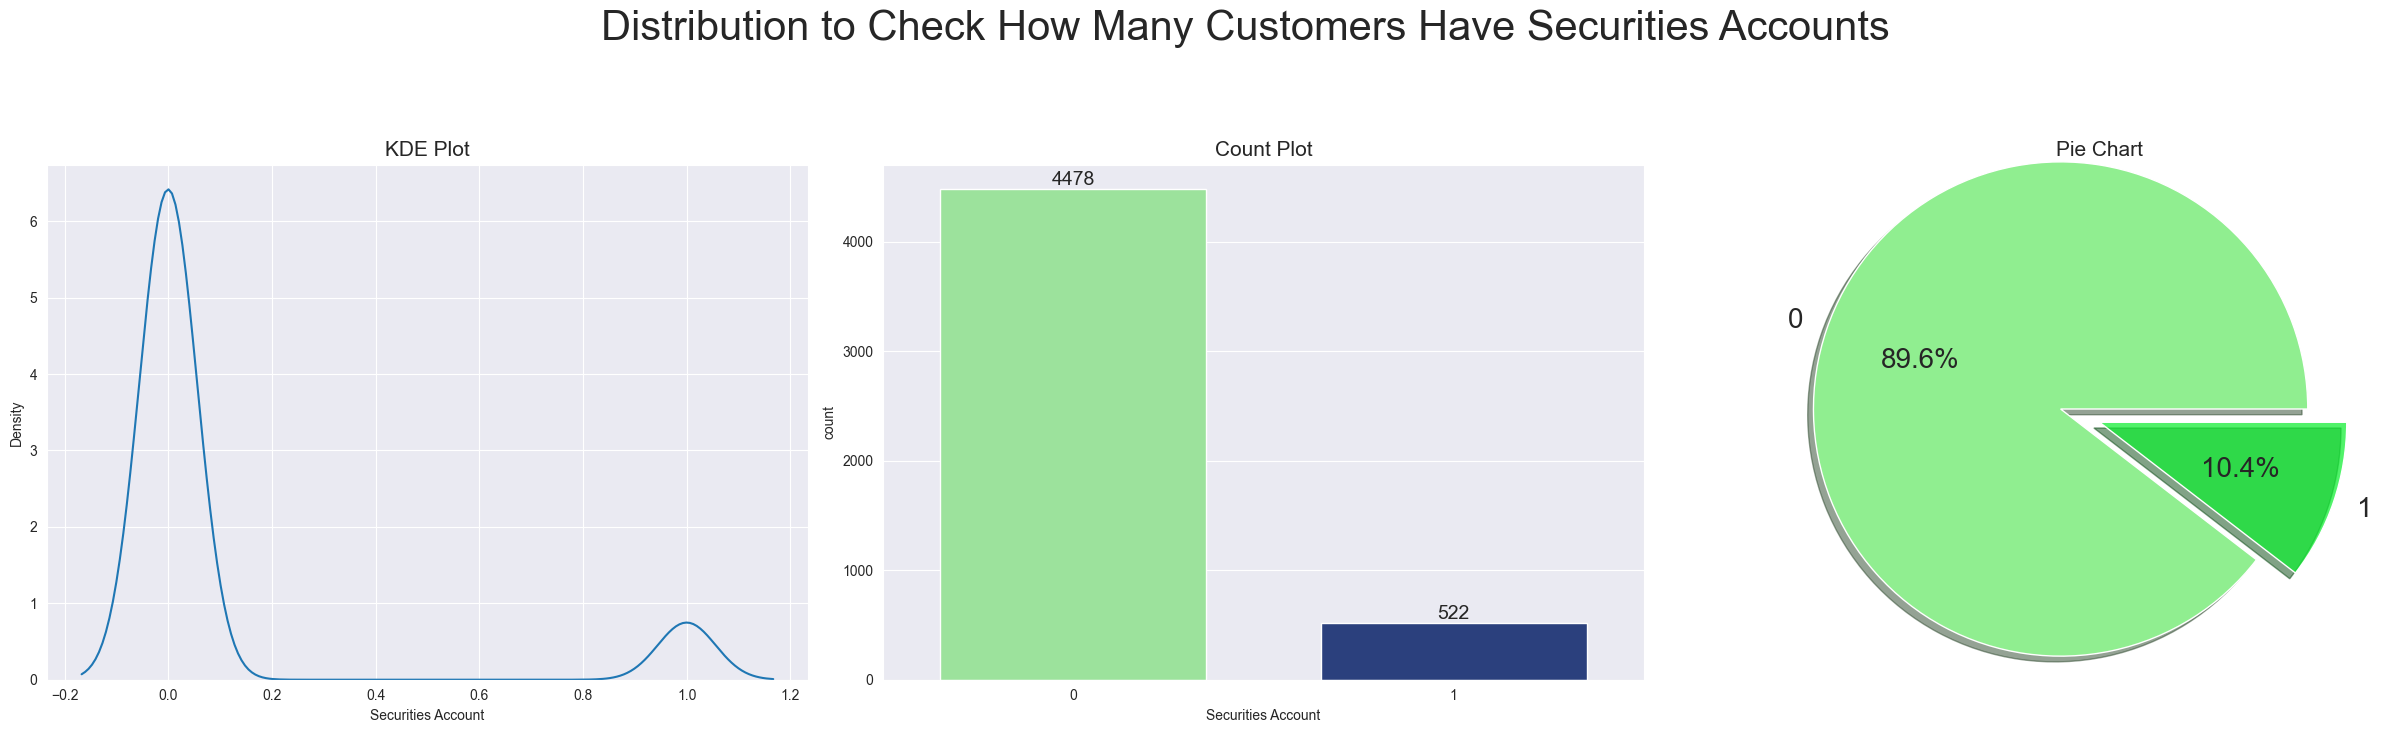

In [28]:
x = data['Securities Account'].value_counts()
labels = ['0', '1']
colors = colors = ['#90EE90', '#1E3B']

plt.figure(figsize=(25, 7))
sns.set_style('darkgrid')


plt.suptitle('Distribution to Check How Many Customers Have Securities Accounts', fontsize=30, y=1.04)

# KDE plot
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='Securities Account')
plt.title('KDE Plot', fontsize=15)

plt.subplot(1, 3, 2)
ax = sns.countplot(x='Securities Account', data=data, palette=['#90EE90', '#1E3A8A'], width=0.7)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )

plt.title('Count Plot', fontsize=15)


plt.subplot(1, 3, 3)
plt.pie(x, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, 
        colors=colors, explode=[0.2, 0], shadow=True, radius=1.2)
plt.title('Pie Chart', fontsize=15)


plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

Approximately 89.6% of customers do not have a securities account with the bank.

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_22380\2427770677.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Securities Account', data=data, palette=['#90EE90', '#1E3A8A'], width=0.7)


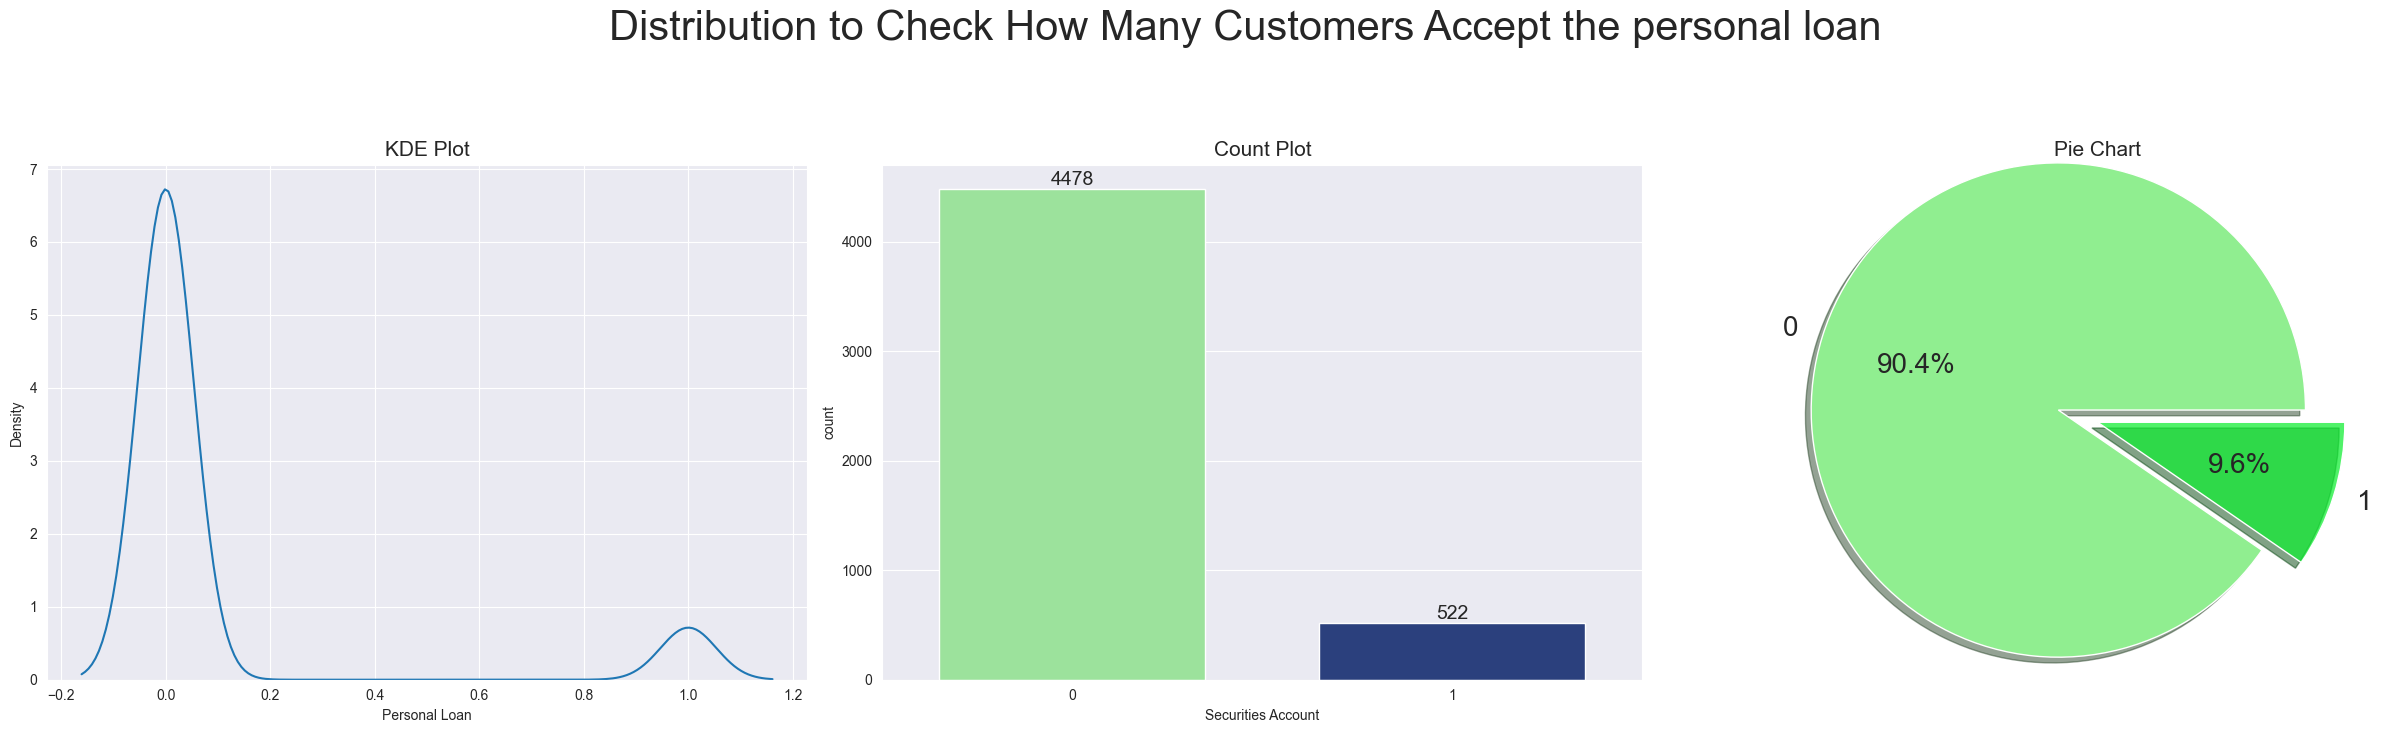

In [29]:
x = data['Personal Loan'].value_counts()
labels = ['0', '1']
colors = colors = ['#90EE90', '#1E3B']

plt.figure(figsize=(25, 7))
sns.set_style('darkgrid')


plt.suptitle('Distribution to Check How Many Customers Accept the personal loan', fontsize=30, y=1.04)

# KDE plot
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='Personal Loan')
plt.title('KDE Plot', fontsize=15)

#COUNT PLOT
plt.subplot(1, 3, 2)
ax = sns.countplot(x='Securities Account', data=data, palette=['#90EE90', '#1E3A8A'], width=0.7)
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(), 
        int(bar.get_height()),  
        ha='center',
        va='bottom', 
        fontsize=14
    )
    
plt.title('Count Plot', fontsize=15)

#PIE CHART
plt.subplot(1, 3, 3)
plt.pie(x, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, 
        colors=colors, explode=[0.2, 0], shadow=True, radius=1.2)
plt.title('Pie Chart', fontsize=15)


plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

After analyzing the graph, it shows that approximately 90.4% of customers have not accepted or been approved for a loan.

In [16]:
data['Income'] = round(data['Income']/12, 2) 

In [31]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1


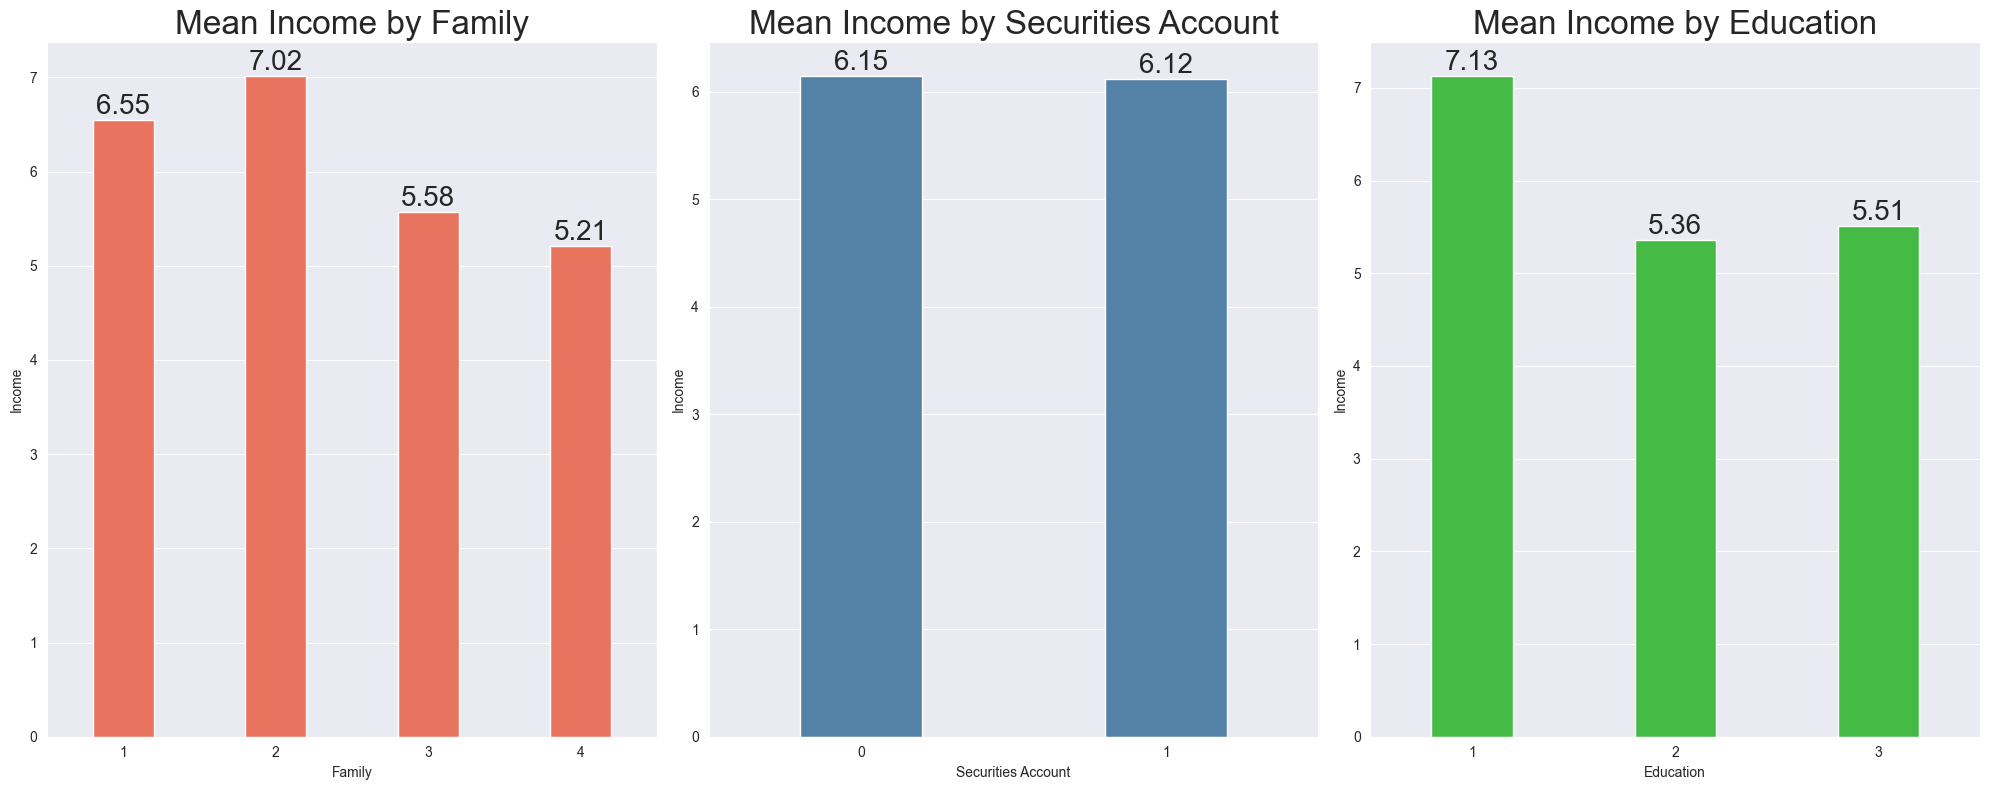

In [32]:
Cols = ['Family', 'Securities Account', 'Education']
colors = ['#FF6347', '#4682B4', '#32CD32']
plt.figure(figsize=(20, 8))  # Adjust figure size for readability

for i, group in enumerate(Cols):
    income_means = data.groupby(group)['Income'].mean().reset_index()
    plt.subplot(1, len(Cols), i + 1) 
    

    ax = sns.barplot(data=income_means, x=group, y='Income', color=colors[i], width=0.4)
    plt.title(f'Mean Income by {group}', fontsize=24)
 
    for bar in ax.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.2f}', 
            ha='center',
            va='bottom',
            fontsize=20
        )
        
plt.tight_layout()  
plt.show()


After plotting the grouped family income means, we found that Family 2 has the highest mean income and Family 4 has the lowest Income mean.
Approximately the mean income of Security Account for 0 and 1 are approx same.
Education[1] people have high income mean than all other education level.

<Axes: >

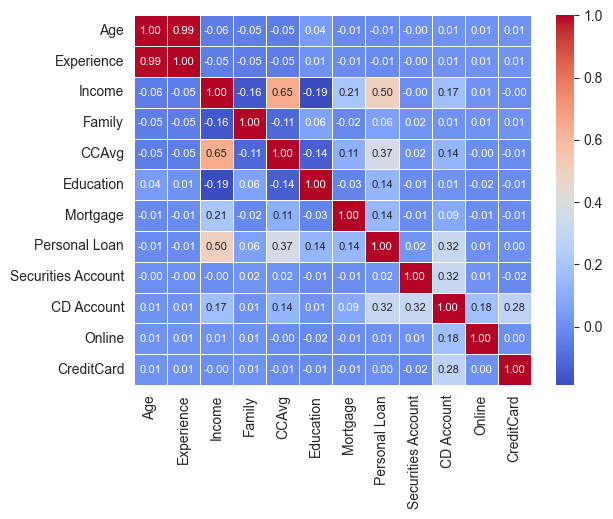

In [33]:
x=data.corr()
sns.heatmap(x,annot=True, annot_kws={'size': 8}, cmap='coolwarm',linewidths=0.5, fmt='.2f')

In [17]:
X = data.drop(columns=['Personal Loan'])
Y = data['Personal Loan']

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
y_test

2764    0
4767    0
3814    0
3499    0
2735    0
       ..
448     0
921     0
4087    1
1242    0
2242    0
Name: Personal Loan, Length: 1000, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_test

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,2765,31,5,7.00,91320,1,2/90,3,105,0,0,0,1
4767,4768,35,9,3.75,90639,3,0/90,1,101,1,0,0,0
3814,3815,34,9,2.92,94304,3,1/30,1,0,0,0,0,0
3499,3500,49,23,9.50,94550,1,0/30,1,286,0,0,1,0
2735,2736,36,12,5.83,92131,3,2/60,2,165,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,31,4,5.00,94588,4,2/00,2,0,0,0,1,1
921,922,31,5,7.58,92096,3,1/60,1,126,0,0,1,1
4087,4088,52,28,14.92,94583,4,4/20,3,0,0,0,0,0
1242,1243,29,4,3.67,91380,4,2/00,2,0,0,0,1,0


# Here we perfomed some feature selection to build our effecient ML model

In [21]:
variance_featur = VarianceThreshold(threshold = 0.4)
feature_select = variance_featur.fit_transform(X_train)
final_features = X_train.columns[variance_featur.get_support()]

ValueError: could not convert string to float: '0/40'

In [38]:
print(final_features)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage'],
      dtype='object')


In [39]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Income                0.134668
CCAvg                 0.098703
CD Account            0.027860
Mortgage              0.021377
Education             0.017898
Securities Account    0.008311
CreditCard            0.008305
Online                0.002814
Experience            0.002628
Family                0.001070
Age                   0.000000
dtype: float64

In [40]:
best_featrs = SelectKBest(mutual_info_classif, k=6)
best_featrs.fit(X_train, y_train)
X_train.columns[best_featrs.get_support()]

Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account'],
      dtype='object')

In [41]:
X_train = X_train.drop(columns=['Online', 'Age', 'CreditCard','Experience', 'Securities Account'])
X_test = X_test.drop(columns=['Online', 'Age', 'CreditCard','Experience', 'Securities Account'])

# Build ML Models-------
We are going to use many ML algorithms to check which gives the best result

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

In [43]:
# KNN-----
scores=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    


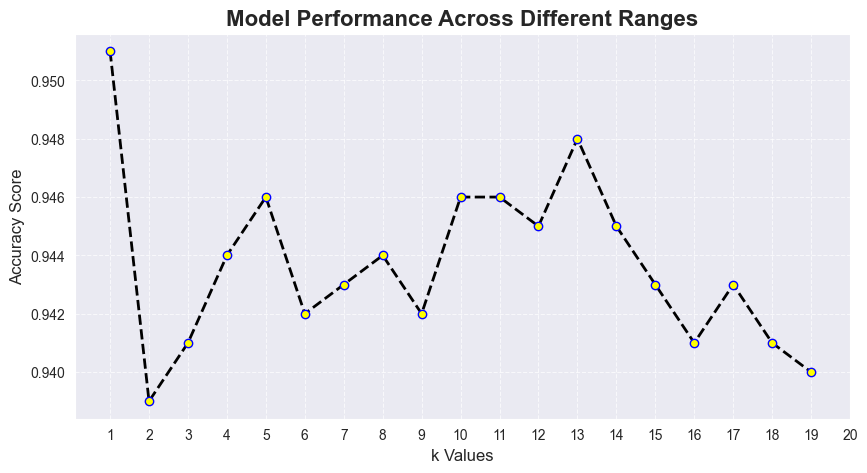

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  
plt.plot(range(1, 20), scores, color='black', marker='o', linestyle='--', linewidth=2, markersize=6, markerfacecolor='yellow', markeredgecolor='blue')

# Add title and labels
plt.title('Model Performance Across Different Ranges', fontsize=16, fontweight='bold')
plt.xlabel('k Values', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.xticks(range(1, 21))  
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [45]:
KNN = knn = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)

In [46]:
print('The accuracy score that we get using KNN: ', knn_score)

The accuracy score that we get using KNN:  0.946


In [47]:
# testing = X_test.iloc[[250]] -------> testing

# Decision Tree

In [48]:
parameters={
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, None]
}

In [49]:
tunning_tree = DecisionTreeClassifier()
cv = GridSearchCV(tunning_tree, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'splitter': ['best', 'random']})

In [50]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}

In [51]:
finalTreeModel = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, splitter= 'best')
finalTreeModel.fit(X_train, y_train)
y_pred1 = finalTreeModel.predict(X_test)
tree_score = accuracy_score(y_test, y_pred1)
print('The accuracy score that we get using Decision Tree: ', tree_score)

The accuracy score that we get using Decision Tree:  0.982


# SVM

# HyperParameter Tuning

In [54]:
param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()

grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [55]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [56]:
SVCModel = SVC(kernel='linear', C=10)
SVCModel.fit(X_train, y_train)
y_pred2 = SVCModel.predict(X_test)
SVCModel_score = accuracy_score(y_test, y_pred2)
print('The accuracy score that we get using Decision Tree: ', SVCModel_score)


The accuracy score that we get using Decision Tree:  0.942


# RandomForest Classifier


In [57]:
param_grid = {
    'n_estimators':[50, 90, 120, 150, 180],
    'max_depth':[1, 2, 3, 5, 6],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'criterion':['entropy', 'gini']
}


In [58]:
rfc = RandomForestClassifier()
rf_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
rf_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 90, 120, 150, 180]})

In [59]:
rf_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'n_estimators': 180}

In [60]:
rfcModel = RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=6, min_samples_leaf=3)
rfcModel.fit(X_train, y_train)
y_pred3 = rfcModel.predict(X_test)
rfcModel_score = accuracy_score(y_test, y_pred3)
print('The accuracy score that we get using Decision Tree: ', rfcModel_score)


The accuracy score that we get using Decision Tree:  0.981


# Adaboost

In [61]:
base_estimator = DecisionTreeClassifier()

adaboost = AdaBoostClassifier(estimator=base_estimator)

param_grid = {
    'n_estimators': [50, 100, 120, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 4, 5] 
}


grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Kuku Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 1, 'n_estimators': 120}
Best Cross-Validation Accuracy: 0.9875
Test Accuracy: 0.985


In [62]:
# AdaB = AdaBoostClassifier()

# GradientBoostingClassifier

In [63]:
gb_clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5] 
}

grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search_gb.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))









Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.985


In [66]:
import pickle

# Assuming `model` is your trained machine learning model
with open('SVCModel.pkl', 'wb') as file:
    pickle.dump(SVCModel, file)


In [ ]:
X_train.head()

In [69]:
data[data['Personal Loan']==1]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,15.00,1,8.9,3,0,1,0,0,0,0
16,38,14,10.83,4,4.7,3,134,1,0,0,0,0
18,46,21,16.08,2,8.1,3,0,1,0,0,0,0
29,38,13,9.92,1,3.3,2,0,1,0,1,1,1
38,42,18,11.75,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,10.75,3,4.1,3,0,1,0,1,1,1
4927,43,19,10.08,1,0.7,2,0,1,0,1,1,1
4941,28,4,9.33,2,1.6,2,0,1,0,0,1,0
4962,46,20,10.17,3,3.0,3,0,1,0,1,1,1
